# Q&A:

1. Will the AND-1 riboswitch cleave itself when both of its OBS are bound?
    1. In the publication, yes.
    2. In my simulation, no.
    
2. Will the OR-1 riboswitch cleave itself when neither of its OBS are bound?
    
    No.
    
    
3. What behavior do we expect from the YES-1 riboswitch?
    
    1. When the OBS is bound with DNA, the riboswitch will cleave itself.( The red regions are bound together)
    
    2. When the OBS is free, the riboswitch won't cleave itself. ( Then red regions are not bound together)

# 1. Copy down the sequences for the riboswitches

## I didn't find the list of sequenced used in the publication. So I just copy down these sequences from pictures in this publication.

In [61]:
YES_1 = "GGGCGACCCUGAUGAGCUUGAGUUUAGCUCGUCACUGUCCAGGUUCAAUCAGGCGAAACGGUGAAAGCCGUAGGUUGCCC"

NOT_1 = "GGCAGGUACAUACAGCUGAUGAGUCCCAAAUAGGACGAAACGCGACACACACCACUAAACCGUGCAGUGUUUUGCGUCCUGUAUUCCACUGC"

AND_1 = "GGGCGACCCUGAUGAGCUUGGUUUAGUAUUUACAGCUCCAUACAUGAGGUGUUAUCCCUAUGCAAGUUCGAUCAGGCGAAACGGUGAAAGCCGUAGGUUGCCCAGAGACAAU"

OR_1 = "GGGCGACCCUGAUGAGCUUGGUUGAGUAUUUACAGCUCCAUACAUGAGGUGUUCUCCCUACGCAAGUUCGAUCAGGCGAAACGGUGAAAGCCGUAGGUUGCCC"



# 2. Create a table of these riboswitches

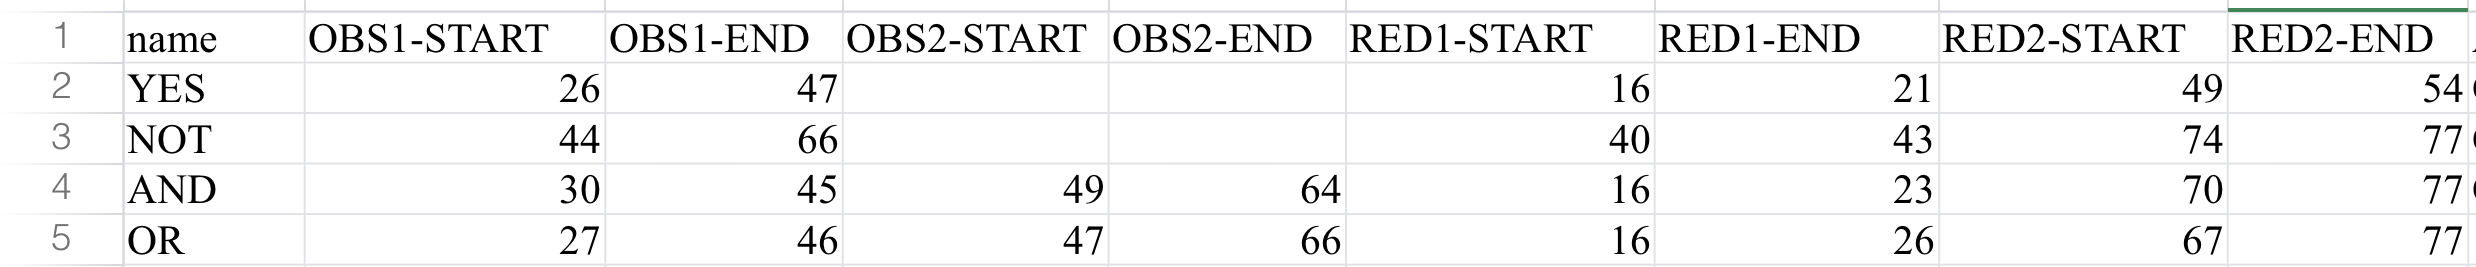

In [58]:
from IPython.display import Image
Image("table.png")

# Write a routine to fold RNA

In [63]:
def RNAfoldANDplot(Seq,i):
    import subprocess
    #All the input of input should be string. It doesn't allow us to use list to input multipal arguments
    foldinput = Seq +'\n' + "@";
    p = subprocess.run(['RNAfold'],
                   input = bytes(foldinput, 'ascii'),
                   stdout = subprocess.PIPE,
                   stderr = subprocess.PIPE)

    output = p.stdout.decode() #This is a string
    outputs = output.split()
    seqoutput = outputs[0]
    alioutput = outputs[1]
    energy = outputs[2]
    
    print("This is the free energy: %s" % energy)
    
    plotinput = ">seq" + str(i) + '\n' + seqoutput + '\n' + alioutput + '\n' + '@';
    #print(plotinput)
    
    
    p1 = subprocess.run(['RNAplot'],
                       input = bytes(plotinput, 'ascii'),
                       stdout = subprocess.PIPE,
                       stderr = subprocess.PIPE)
    name = "seq"+ str(i) +'_ss'
    
    p2 = subprocess.call('convert %s.ps %s.png' %(name, name), shell = True)


In [64]:
seq_list = [YES_1, NOT_1, AND_1, OR_1]

for i in range(0,4):
    
    RNAfoldANDplot(seq_list[i], i)

This is the free energy: (-33.00)
This is the free energy: (-28.10)
This is the free energy: (-42.10)
This is the free energy: (-40.00)


# 3. Plots and initial analyse

## 1). YES-1

### Plot the picture

This is Yes_1 gate:



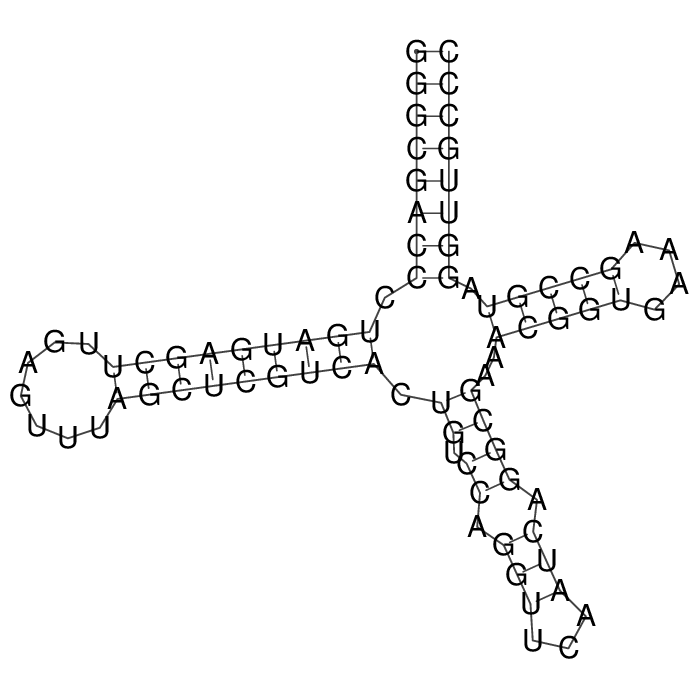

In [34]:
print("This is Yes_1 gate:\n")
Image("seq0_ss.png")

## Q: Is the conformation of YES-1 given in the publication the same with your plot with RNAfold?

## A: They are different.

### 1. The stem III are the same in the two plots (At the right of my plot). But stem IV in the conformation given in the publication doesn't exist in the plot I got. In my plot, the stem IV is replaced by 2 seperated stems.

### 2. Though they are different conformation, the red regions also can't bind to each other in my RNAfold conformation. In other words, in my conformation, it doesn't form the stem II which has cleavage activaty.


## 2). NOT-1

### Plot the picture

This is Not_1 gate:



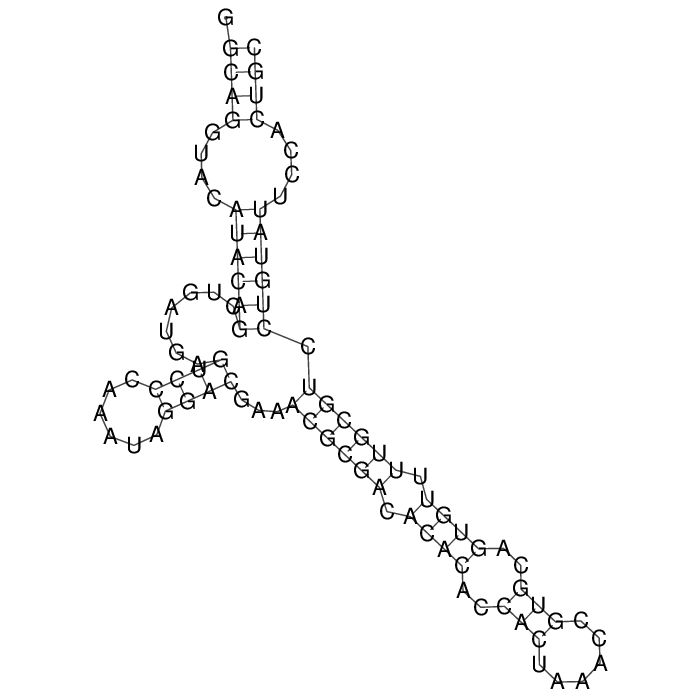

In [36]:
print("This is Not_1 gate:\n")
Image("seq1_ss.png")

 ## Q: Is the conformation of NOT-1 given in the publication the same with your plot with RNAfold?
 
 ## A: They are the same.
 
 ### 1. They both have a stem I with a bulge, a stem II and a stem III with 2 bulges. 
 
 ### 2. What's more, the red regions in my plot can bind together just like the the conformation in the paper. So the state without OBS binding (ON State) can cut it self like it's predicted to be.
 
 

## 3). AND-1

### Plot the picture

This is AND_1 gate:



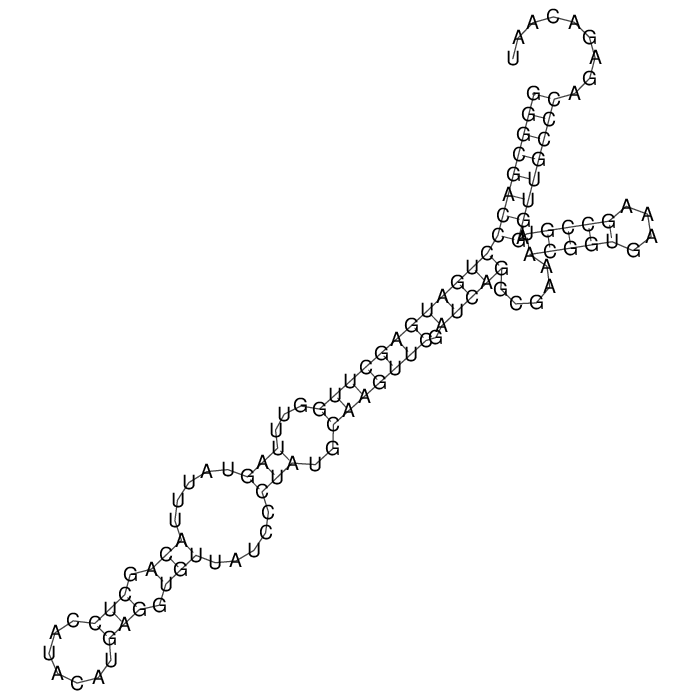

In [37]:
print("This is AND_1 gate:\n")
Image("seq2_ss.png")

 ## Q: Is the conformation of AND-1 given in the publication the same with your plot with RNAfold?
 
 ## A: They are the same.
 
 ### 1. They both have stem III and stem IV.
 
 ### 2. The red regions in my plot can't bind together. So it has no self-cleave activity in the OFF state.

## 4). OR-1 

### Plot the picture

This is OR_1 gate:



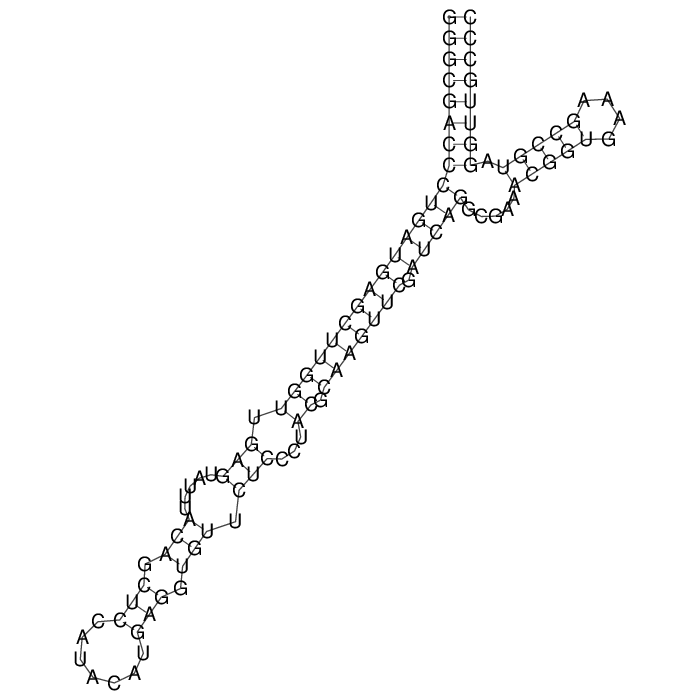

In [38]:
print("This is OR_1 gate:\n")
Image("seq3_ss.png")

 ## Q: Is the conformation of OR-1 given in the publication the same with your plot with RNAfold?
 
 ## A: They are the same.
 
 1. They both have stem III and stem IV.
 
 2. The red regions in my plot can't bind together. So it has no self-cleave activity in the OFF state.

# Analyze about the differences

## 1. The temperature defaults are the same in RNAfold and in publication. Both of them are 37℃

## 2. The algrithms are the same, they all used a partition fuction algorithm.
  The paper used a partition function algorithm. This algrithm is in this puclication          
                                                            https://onlinelibrary.wiley.com/doi/abs/10.1002/bip.360290621
                                                            
                                                                                                                                                                                              
## 3. The obvious differences are only in YES-1 gate, so I checked the free energy of the different conformations. The RNAfold tool gives a conformation of YES-1 with free energy -33 kcal*mol^-1. But in the paper, the free energy of unbound YES-1 is -35.6kcal*mol^-1. So the publication gave the lower free energy conformation.

## 4. I found a statement in the paper which is "The YES-1 RNA construct ......... are predicted to have the potential to form several alternative secondary structures that all preclude formation fo stem II.".  So maybe the RNAfold just gives me one of these alternative secondary structures. 
    

# 4. Generate the constraint files.

## YES-1 needs 1 constraint file.
## NOT-1 needs 1 constraint file.
## AND-1 needs 3 constraint files.
## OR-1 needs 3 constraint files.

### This is a generator for constraint files in which 1 OBS is bound.

In [40]:
def generate_1_OBS_con(name, seq, start, end):
    con = seq + '\n'
    for i in range(0,len(seq)):
        if i < start-1 or i > end-1 :
            con = con + "."
        else:
            con = con + "x"
    with open("%s.txt" %name, "w") as f:
        f.write(con)

### This is a generator for constraint files in which 2 OBS are bound.

In [41]:
def generate_2_OBS_con(name, seq, start1, end1, start2, end2):
    con = seq + '\n'
    for i in range(0, len(seq)):
        if (i >= start1-1 and i <= end1-1) or (i >= start2-1 and i <= end2-1):
            con = con + 'x'
        else:
            con = con + '.'
    with open("%s.txt" %name, "w") as f:
        f.write(con)

In [42]:
generate_1_OBS_con("YES", YES_1 , 26, 47)
generate_1_OBS_con("NOT", NOT_1 , 44, 66)

generate_1_OBS_con("AND_1_0", AND_1, 30, 45)
generate_1_OBS_con("AND_0_1", AND_1, 49, 64)

generate_1_OBS_con("OR_1_0", OR_1, 27, 46)
generate_1_OBS_con("OR_0_1", OR_1, 47, 66)

## This is a new routine to fold and plot RNA in constraint.

In [43]:
def RNAfoldANDplot_con(name, Seq, con_name):
    import subprocess
    #All the input of input should be string. It doesn't allow us to use list to input multipal arguments
    #foldinput = Seq +'\n' + "@";
    p = subprocess.run(['RNAfold', '-C', con_name],
                   #input = bytes(foldinput, 'ascii'),
                   stdout = subprocess.PIPE,
                   stderr = subprocess.PIPE)

    output = p.stdout.decode() #This is a string
    outputs = output.split()
    seqoutput = outputs[0]
    alioutput = outputs[1]
    
    plotinput = ">" + name + '\n' + seqoutput + '\n' + alioutput + '\n' + '@';
    print(plotinput)
    
    
    p1 = subprocess.run(['RNAplot'],
                       input = bytes(plotinput, 'ascii'),
                       stdout = subprocess.PIPE,
                       stderr = subprocess.PIPE)
    name = name + '_ss'
    
    p2 = subprocess.call('convert %s.ps %s.png' %(name, name), shell = True)


In [44]:
RNAfoldANDplot_con("YES_con", YES_1, "YES.txt")
RNAfoldANDplot_con("NOT_con", NOT_1, "NOT.txt")

RNAfoldANDplot_con("AND_1_0", AND_1, "AND_1_0.txt")
RNAfoldANDplot_con("AND_0_1", AND_1, "AND_0_1.txt")

RNAfoldANDplot_con("OR_1_0", OR_1, "OR_1_0.txt")
RNAfoldANDplot_con("OR_0_1", OR_1, "OR_0_1.txt")

>YES_con
GGGCGACCCUGAUGAGCUUGAGUUUAGCUCGUCACUGUCCAGGUUCAAUCAGGCGAAACGGUGAAAGCCGUAGGUUGCCC
((((((((.......((((((...........................))))))...(((((....))))).))))))))
@
>NOT_con
GGCAGGUACAUACAGCUGAUGAGUCCCAAAUAGGACGAAACGCGACACACACCACUAAACCGUGCAGUGUUUUGCGUCCUGUAUUCCACUGC
.((((....((((((..((((.((((......))))(((((((.......................))))))).))))))))))....))))
@
>AND_1_0
GGGCGACCCUGAUGAGCUUGGUUUAGUAUUUACAGCUCCAUACAUGAGGUGUUAUCCCUAUGCAAGUUCGAUCAGGCGAAACGGUGAAAGCCGUAGGUUGCCCAGAGACAAU
((((((((((((((((((((..........................(((.(....))))...))))))).))))).....(((((....))))).)))))))).........
@
>AND_0_1
GGGCGACCCUGAUGAGCUUGGUUUAGUAUUUACAGCUCCAUACAUGAGGUGUUAUCCCUAUGCAAGUUCGAUCAGGCGAAACGGUGAAAGCCGUAGGUUGCCCAGAGACAAU
(((((((((((((((((((((...(((.......))))))........................))))).))))).....(((((....))))).)))))))).........
@
>OR_1_0
GGGCGACCCUGAUGAGCUUGGUUGAGUAUUUACAGCUCCAUACAUGAGGUGUUCUCCCUACGCAAGUUCGAUCAGGCGAAACGGUGAAAGCCGUAGGUUGCCC
((((((((((((((((((((((.(((..................

In [45]:
generate_2_OBS_con("AND_1_1", AND_1, 30, 45, 49, 64 )

generate_2_OBS_con("OR_1_1", OR_1, 27, 46, 47, 66 )


In [46]:
RNAfoldANDplot_con("AND_1_1", AND_1, "AND_1_1.txt")

RNAfoldANDplot_con("OR_1_1", OR_1, "OR_1_1.txt")

>AND_1_1
GGGCGACCCUGAUGAGCUUGGUUUAGUAUUUACAGCUCCAUACAUGAGGUGUUAUCCCUAUGCAAGUUCGAUCAGGCGAAACGGUGAAAGCCGUAGGUUGCCCAGAGACAAU
((((((((((((((((((..............................................))))).))))).....(((((....))))).)))))))).........
@
>OR_1_1
GGGCGACCCUGAUGAGCUUGGUUGAGUAUUUACAGCUCCAUACAUGAGGUGUUCUCCCUACGCAAGUUCGAUCAGGCGAAACGGUGAAAGCCGUAGGUUGCCC
((((((((.......(((((((((((........................................)))))))))))...(((((....))))).))))))))
@


# 5. Constraint YES gate

In [47]:
from IPython.display import Image

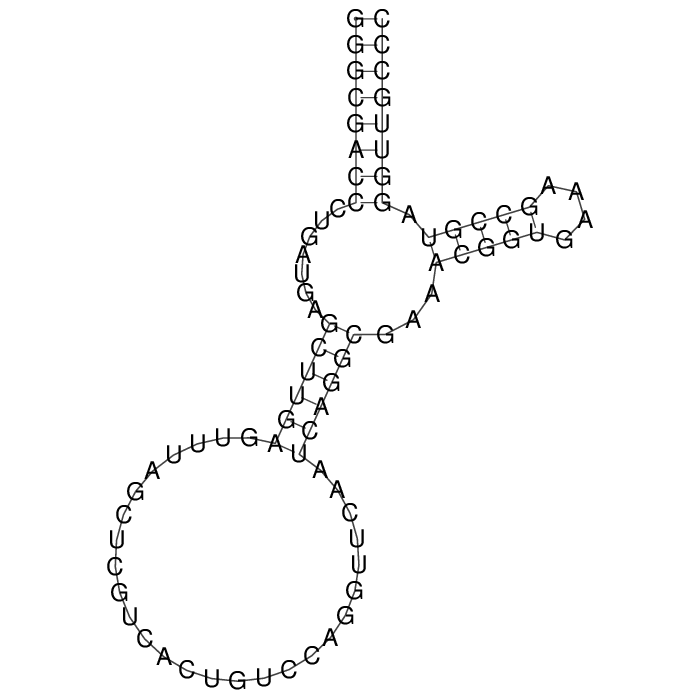

In [48]:
Image("YES_con_ss.png")

## Q1: Does it look like the self-cleaving form of YES-1 in Figure 2?

## A: Yes! They look like the same.


## Q2: Are the red regions bound to each other?

## A: Yes. They are bound to each other.


# 6. Constraint NOT gate

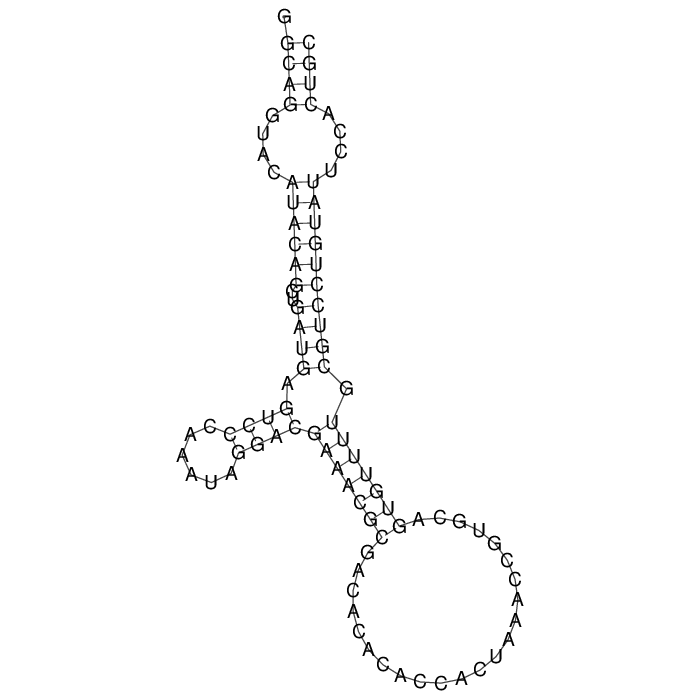

In [49]:
Image('NOT_con_ss.png')

## Q1: Does it look like the self-cleaving form of YES-1 in Figure 2?

## A: Yes! They look like the same.


## Q2: Are the red regions bound to each other?

## A: No, the red regions are not bound to each other. Because it is a not gate, when OBS is bound to effectors, the ribozyme should be self-cleavage inactive.

# 7. Constraint AND gate

### OBS1 is 1,  OBS2  is 0

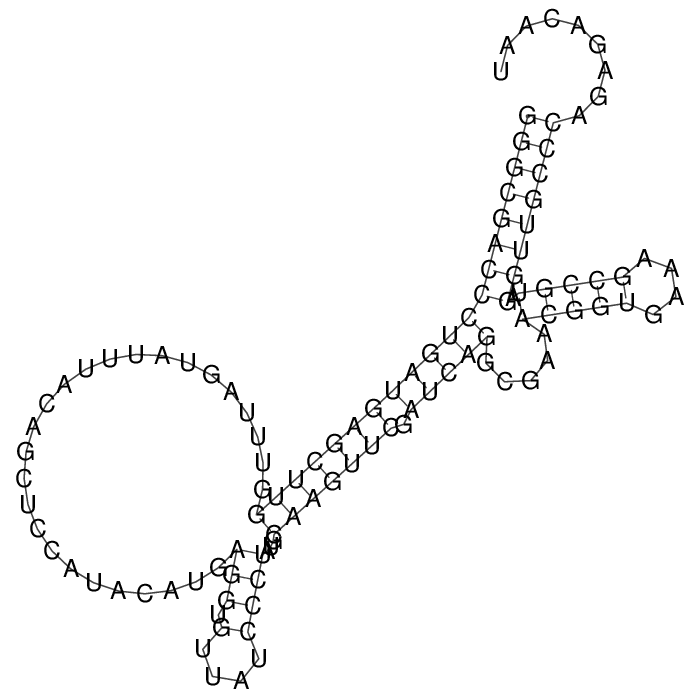

In [50]:
Image("AND_1_0_ss.png")

### This plot's Stem IV is slightly different with the conformation given by the publication. But it doesn't matter the output. Because the red regions are not bound to each other, the output is 0.

### OBS1 is 0, OBS2 is 1

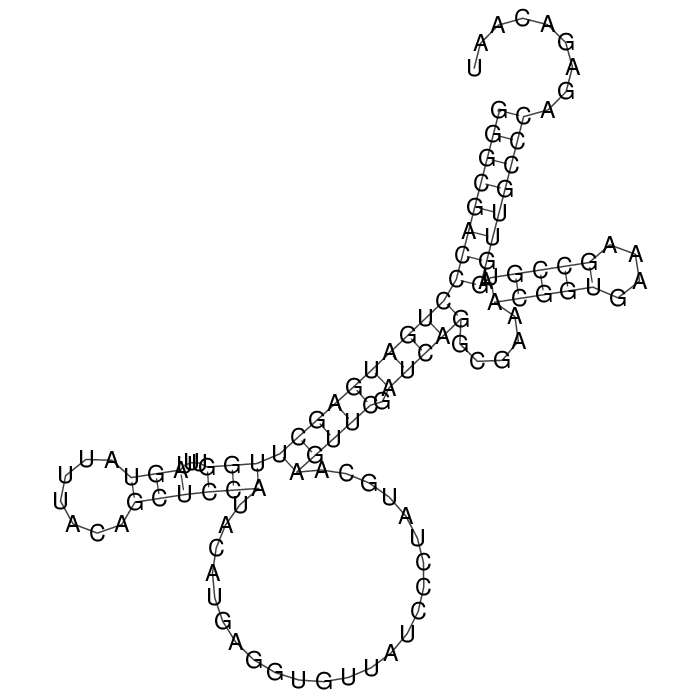

In [51]:
Image("AND_0_1_ss.png")

### The red regions are not bound together, so the output is 0.

### OBS1 and OBS2 are both 1

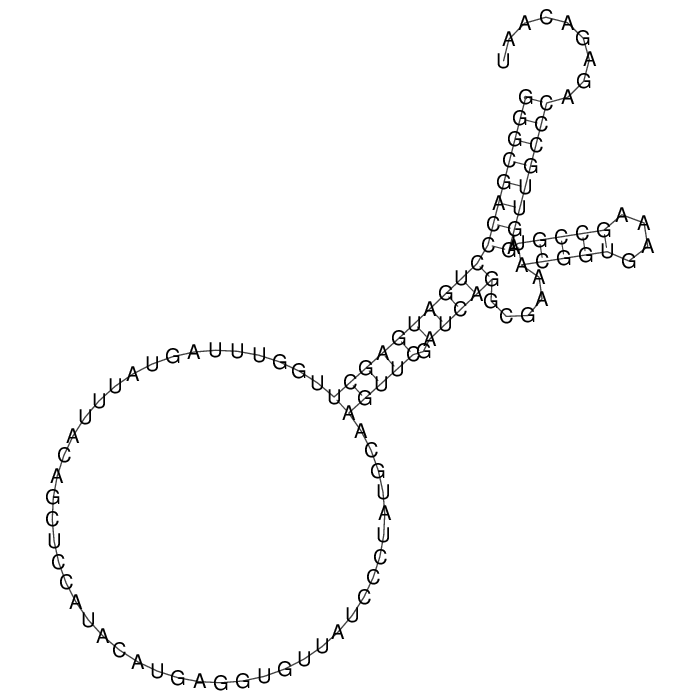

In [52]:
Image("AND_1_1_ss.png")

### This is different with the output given by the publication. The red regions in my plot are not bound together.  So the output here is 0.

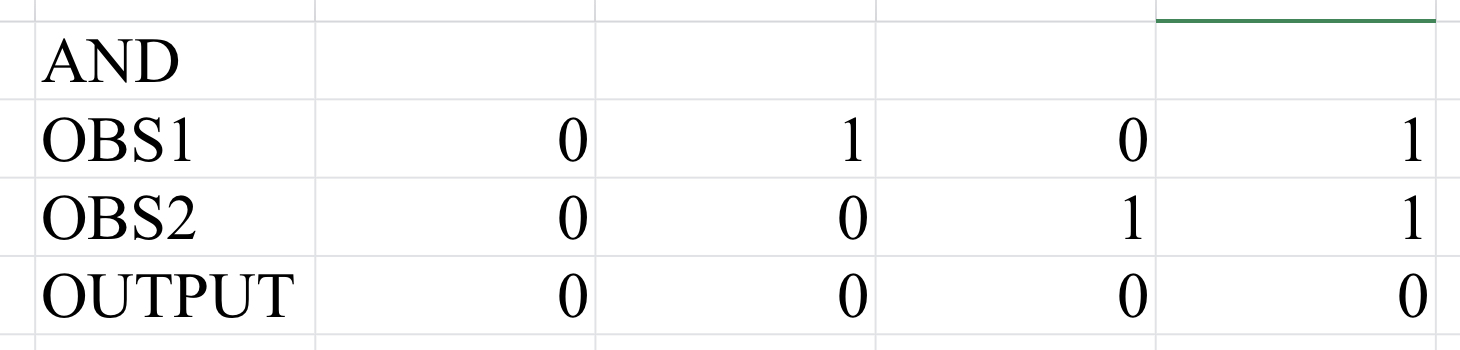

In [56]:
Image("And_logic.png")

# 8. Constraint OR gate

### OBS1 is 1, OBS2 is 0

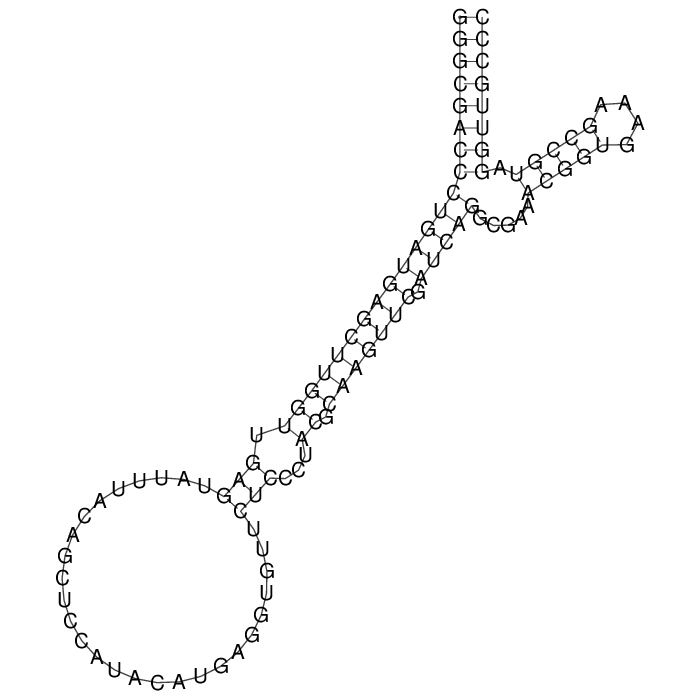

In [53]:
Image("OR_1_0_ss.png")

### OBS1 is 0, OBS2 is 1

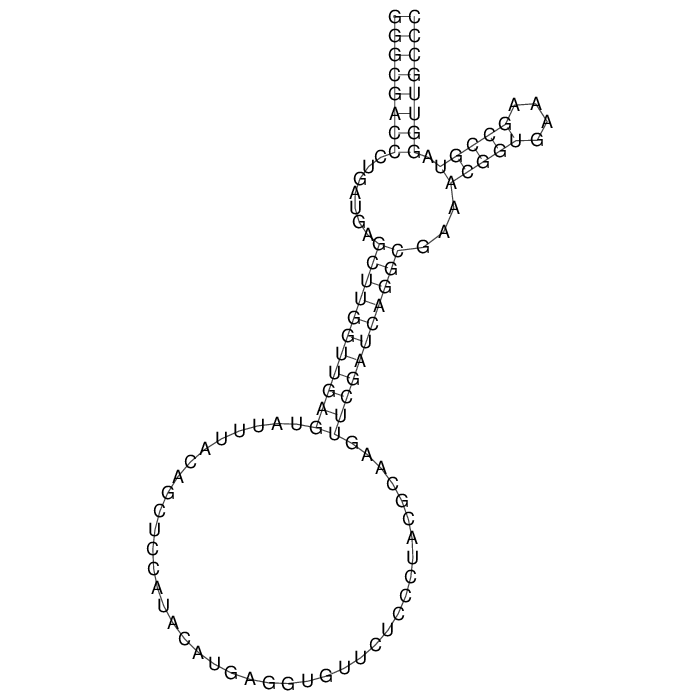

In [54]:
Image("OR_0_1_ss.png")

### The red regions are bound together. So the output is 1.

### OBS1 and OBS2 are both 1

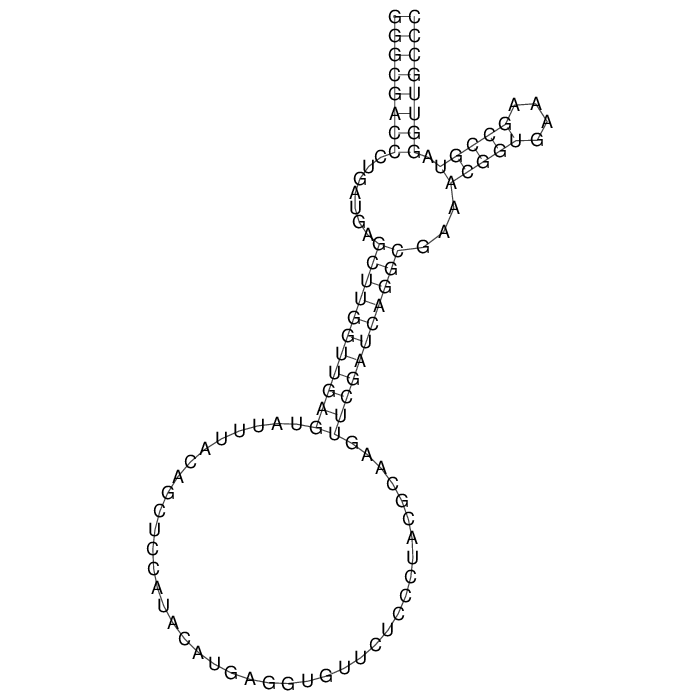

In [55]:
Image("OR_1_1_ss.png")

### The red regions are bound together, so the output is 1.

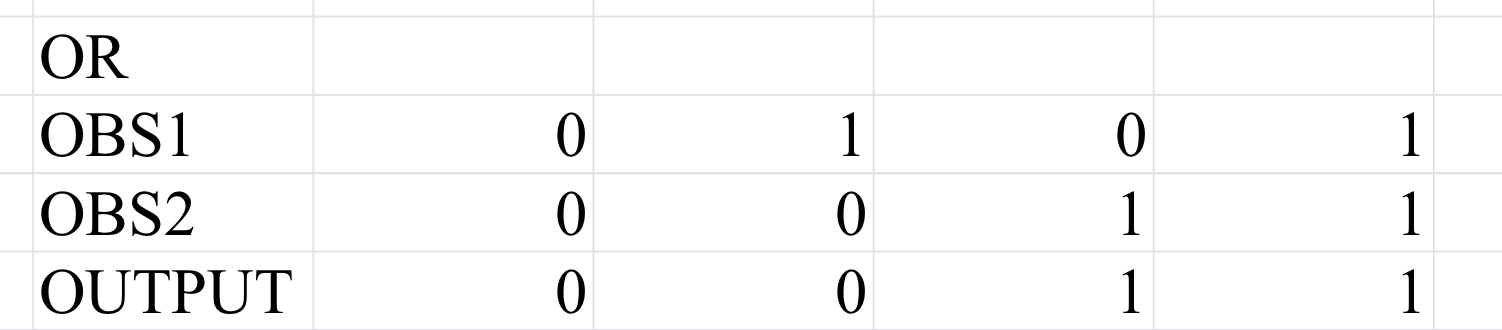

In [57]:
Image("Or_logic.png")

# Q: According to your results, do the AND-1 and OR-1 riboswitches work as the paper claims?

# A: No, neither of them act like the paper said. 

I think it's the differences between solution parameters affect the results. In the publication, it said that “In an assay mixture that more closely approximates physiological conditions (50 mM Tris- HCl, pH 7.5 at 23 1C, 100 mM KCl, 25 mM NaCl, and 2 mM MgCl2), But I didn't set these solution parameters in my RNAfold routine.
